### 3M1 Mathematical Methods - computer laboratory exercise 2019
# Principal Component Analysis

This laboratory introduces principal component analysis (PCA), which is one of the most commonly used and simplest data analysis techniques. It is a straightforward application of Singular Value Decomposition (SVD), so this exercise also serves to show a practical application of SVD.

The structure of this notebook is as follows:

1. Preliminaries: Python notebooks
1. Problem statement
1. Importing data
1. Plotting
1. PCA "theory"
1. Low dimensional worked example: vertebral diagnosis
1. Intructions to do PCA analysis for a larger example: cancer gene expressions

The exercise should take a couple of hours, including setup and learning your way around how Python handles matrices. You will spend a considerable amount of time just reading the example below. Assessment will be in the form of a quiz on moodle, to be released in in a couple of weeks. 

## Preliminaries

The focus of this lab is linear algebra, not programming, but obviously one needs some way to instruct a computer to carry out linear algebra. The easiest way to achieve this is via Python, and in the environment of Notebooks. Think of it as a very very powerful calculator. 

There are many ways to work with Python Notebooks, including running it completely on your own computer, but for now the simplest is to use online tools. Cambridge University has an agreement with Microsoft that results in every CrsID being a valid login to their [Azure computing cloud](https://notebooks.azure.com). 

This notebook is located (amongst other places) in [my workspace](https://notebooks.azure.com/GaborCsanyi/libraries/3M1lab) within Azure, and if you click on the preceding link, you will be taken there. In order to run the notebook, click on "clone", which might ask you to log in, but after that you have your own copy. Running in opens up the notebook in a separate tab, and you can click on every text or computation cell. Shift-enter executes the computation and shows you the result. Use the buttons to create a new cell and add some numbers together! Who needs a calculator anymore? The examples below will introduce you to manipulating matrices, and also to simple plotting of graphs. 

You can create your own notebooks, run and save them within Azure. Later on, you might want to install a Python system such as [Anaconda](https://anaconda.org/) which lets you program in Python on your own computer, including running notebooks locally. 

## Problem statement

Suppose we have a data set that consists of $N$ instances of something, and each instance has $M$ attributes. We would like to understand this dataset better: in which attribute do a lot of the instances differ the most? Are there groups of instances which share similar attributes? Can we summarise the data better by combining several attributes together? Principal component analysis provides a simple answer to all of these questions. The key word is "simple" here, in fact all relationships that PCA lets you discover are _linear_ in the original attributes. There might be more complex relationships which are beyond PCA. 

To make it concrete, let us examine a data set from [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), specifically one on the [vertebral column](http://archive.ics.uci.edu/ml/datasets/Vertebral+Column). Each instance is a patient, the six features correspond to six biomechanical attributes. Some of the patients are healthy ("normal"), others have either disk hernia or spondilolysthesis. The data analysis task is ultimately to learn if the biomechanical features are predictors of the health status, and if so, which ones or which combinations. 


## Importing the data

We will load the data into a matrix $X$, in which each row corresponds to a patient, and each column corresponds one of the six biomechanical features: pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The elements of the matrix are real numbers. 

In [1]:
import numpy as np # First we load the Python library that helps with manipulating data

In [2]:
X = np.genfromtxt('vertebral_column_data.csv', delimiter=',') # the data is in a CVS file

Let's find out how many patients we have, and confirm that there are indeed six features

In [3]:
X.shape

(310, 7)

The ".shape" attribute of a matrix is a "tuple", in this case a pair of numbers, the first shows the number of rows, the second shows the number of columns. So why are there 7 columns?? The last one is the diagnosis made by a doctor, with a "1" corresponding to "disk hernia", "2" corresponding to "spondilolysthesis", and "3" corresponding to "normal". Let us examine some elements of the matrix.

In [4]:
X

array([[ 63.03,  22.55,  39.61, ...,  98.67,  -0.25,   1.  ],
       [ 39.06,  10.06,  25.02, ..., 114.41,   4.56,   1.  ],
       [ 68.83,  22.22,  50.09, ..., 105.99,  -3.53,   1.  ],
       ...,
       [ 61.45,  22.69,  46.17, ..., 125.67,  -2.71,   3.  ],
       [ 45.25,   8.69,  41.58, ..., 118.55,   0.21,   3.  ],
       [ 33.84,   5.07,  36.64, ..., 123.95,  -0.2 ,   3.  ]])

Not all elements are printed, just a few. We can inspect a given row, for example the first one, corresponding to the first patient. Beware that indices in Python start with 0.

In [5]:
X[0,:]

array([63.03, 22.55, 39.61, 40.48, 98.67, -0.25,  1.  ])

The ":" symbol in place of an index represents "all" the elements. We can look at a column as well, e.g. the first one, which corresponds to the first attribute of every patient. 

In [6]:
X[:,0]

array([ 63.03,  39.06,  68.83,  69.3 ,  49.71,  40.25,  53.43,  45.37,
        43.79,  36.69,  49.71,  31.23,  48.92,  53.57,  57.3 ,  44.32,
        63.83,  31.28,  38.7 ,  41.73,  43.92,  54.92,  63.07,  45.54,
        36.13,  54.12,  26.15,  43.58,  44.55,  66.88,  50.82,  46.39,
        44.94,  38.66,  59.6 ,  31.48,  32.09,  35.7 ,  55.84,  52.42,
        35.49,  46.44,  53.85,  66.29,  56.03,  50.91,  48.33,  41.35,
        40.56,  41.77,  55.29,  74.43,  50.21,  30.15,  41.17,  47.66,
        43.35,  46.86,  43.2 ,  48.11,  74.38,  89.68,  44.53,  77.69,
        76.15,  83.93,  78.49,  75.65,  72.08,  58.6 ,  72.56,  86.9 ,
        84.97,  55.51,  72.22,  70.22,  86.75,  58.78,  67.41,  47.74,
        77.11,  74.01,  88.62,  81.1 ,  76.33,  45.44,  59.79,  44.91,
        56.61,  71.19,  81.66,  70.95,  85.35,  58.1 ,  94.17,  57.52,
        96.66,  74.72,  77.66,  58.52,  84.59,  79.94,  70.4 ,  49.78,
        77.41,  65.01,  65.01,  78.43,  63.17,  68.61,  63.9 ,  85.  ,
      

## Basic plotting

We don't get very in comprehending even this small data set by just looking at the numbers. So let us plot a few a few things. For example, we can make a scatterplot of all the patiants, using the first two attributes as x and y axes.

In [7]:
from pylab import * # import some shortcuts to plotting functionality

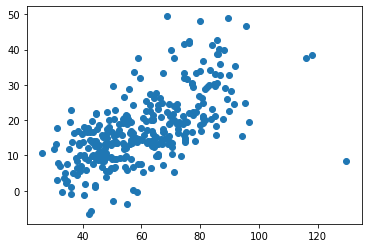

In [8]:
scatter(X[:,0], X[:,1])
plt.show()

It is clear that there are big variations in the first two attributes, and they are not entirely uncorrelated. Here is the same for the third and fourth:

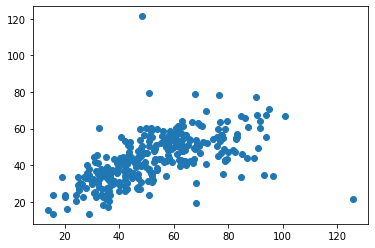

In [9]:
scatter(X[:,2], X[:,3])
plt.show()

Again there are correlations, with a couple of outliers. 

We can also plot histograms of all six attributes, coloured according to the diagnosis. First we create index lists corresponding to patients with a given diagnosis.

In [10]:
# This creates a list of indices for which the 7th column of X is 1,
# ie. those patients who have been diagnosed with disk hernia

diagnosis = X[:,6]
dh = [index for index,value in enumerate(diagnosis) if value == 1]

# same for spondilolysthesis
sl = [index for index,value in enumerate(diagnosis) if value == 2]
# and for normal patients
no = [index for index,value in enumerate(diagnosis) if value == 3]

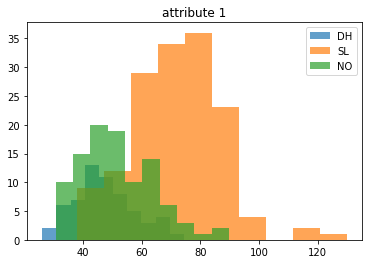

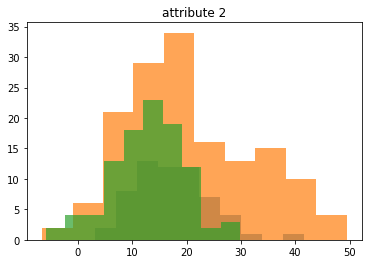

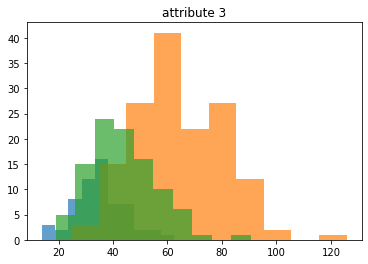

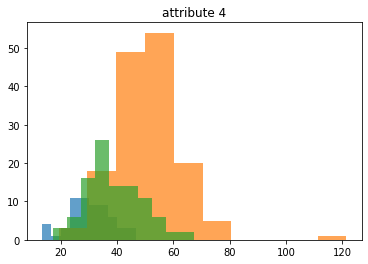

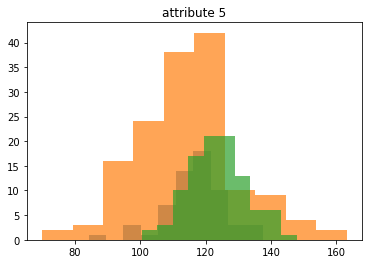

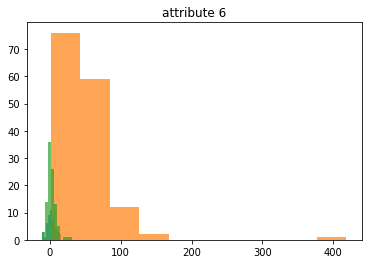

In [11]:
plt.hist(X[dh,0], alpha=0.7)
plt.hist(X[sl,0], alpha=0.7)
plt.hist(X[no,0], alpha=0.7)
legend(["DH", "SL", "NO"])
title("attribute 1")
plt.show()
plt.hist(X[dh,1], alpha=0.7)
plt.hist(X[sl,1], alpha=0.7)
plt.hist(X[no,1], alpha=0.7)
title("attribute 2")
plt.show()
plt.hist(X[dh,2], alpha=0.7)
plt.hist(X[sl,2], alpha=0.7)
plt.hist(X[no,2], alpha=0.7)
title("attribute 3")
plt.show()
plt.hist(X[dh,3], alpha=0.7)
plt.hist(X[sl,3], alpha=0.7)
plt.hist(X[no,3], alpha=0.7)
title("attribute 4")
plt.show()
plt.hist(X[dh,4], alpha=0.7)
plt.hist(X[sl,4], alpha=0.7)
plt.hist(X[no,4], alpha=0.7)
title("attribute 5")
plt.show()
plt.hist(X[dh,5], alpha=0.7)
plt.hist(X[sl,5], alpha=0.7)
plt.hist(X[no,5], alpha=0.7)
title("attribute 6")
plt.show()


It is obvious from the histograms, that the population of patients with spondilolysthesis are quite different in their statistics, but there are big overlaps in all the attributes with the other two populations, and it would be difficult to point to a single attribute that allows the identification of that condition. PCA will come to the rescue. 

The other two populations, those patients with disk hernia and those who are healthy overlap almost perfectly in their distributions when each attribute is considered in isolation. It remains to be seen whether we will be able to separate the these to populations by considering all the attributes together. 


You might think that just using the scatter plot of two attributes solves this problem. Let's try it:

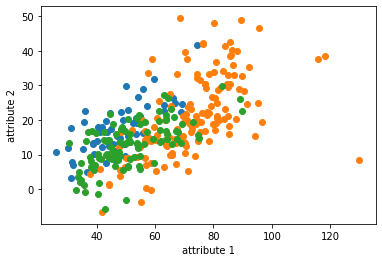

In [12]:
scatter(X[dh,0], X[dh,1])
scatter(X[sl,0], X[sl,1])
scatter(X[no,0], X[no,1])
xlabel("attribute 1")
ylabel("attribute 2")
plt.show()

The groups are somewhat better separated, but we have arbitrarily chosen the first two attributes, and there is still considerable overlap.

## PCA theory

#### The optimal rotation of the data ellipsoid

What PCA tries to do, is to find linear combinations of the attributes which, when used as new variables, allow the best separation of the data. Another way of saying the same thing is to find new variables whose values "explain" the most variation in the data, in order. Yet another way is to imagine the data as an ellipsoidal cloud in the higher dimensional attribute-space, and finding the orthogonal axes of this ellipsoid, in order, first the "longest" axis, then the second longest, etc. 

A formal way of saying this is that first we are looking for a vector $w_1$, such that the data projected onto this vector has the largest variance, i.e. 

$$
w_1 = {\rm arg} \max_{w} \sum_i^N (X_i \cdot w)^2
$$

where $X_i$ is the vector corresponding to the attributes of patient $i$. This is equivalent to maximising 

$$
wX^T Xw
$$

which is achieved by the eigenvector of $X^T X$ with the largest eigenvalue. The second axis of the ellipsoid will be the eigenvector with the second largest eigenvalue, etc. 

Note that above we implicitly assumed that the mean of the data is zero along all attributes, so we will have to {\em normalise} the data to achieve this, i.e. subtract the mean value from each attribute. And since we are inly interesting in finding the directions of the orthogonal axes, it is also customary to multiply each attribute by a scalar so that their variances are unity. 

Before going further, let us write a function that normalises any data matrix, this will be useful later on!

In [13]:
def normalise(x):
    ndata,ndim = x.shape # obtain the number of rows and columns
    m= x.sum(axis=0)     # compute the mean along each column, and collect it into a vector
    #print m
    x0 = x - m[np.newaxis,:]/ndata # subtract the mean divided by the number of rows from each element
                                   # the "np.newaxis" construct creates identical rows from the same mean value

    s = np.sqrt((x0**2).sum(axis=0)/ndata) # now compute the standard deviation of each column
    #print x
    #print s
    ss = np.array([ tmp if tmp != 0 else 1 for tmp in s]) # if the standard deviation is zero, replace it with 1
                                                       # to avoid division by zero error
    x00 = x0 / ss[np.newaxis,:]    # divide each element by the corresponding standard deviation
    return x00                     # return the normalised data matrix

## Worked example

Having written the function, let us apply it to our data matrix X

In [14]:
X0 = normalise(X[:,0:6]) # we only normalise the attributes, so the first 6 columns, 
                         # not the last column, that's the diagnosis!

We can verify that its attributes now have zero mean:

In [15]:
X0.sum(axis=0)

array([ 7.77156117e-15, -3.23963079e-13, -1.11022302e-14,  4.01900735e-14,
       -6.09845507e-13, -6.85007606e-14])

close enough!

In [102]:
X0.var()

0.986460159750634

Now we form the $X^T X$ matrix (using the normalised data), and obtain its eigenvalues and eigenvectors:

In [16]:
# There are several ways to multiply matrices, depending on how they are created. 
# in the current case, using the matmul() function is one way. 
XTX = np.matmul(np.transpose(X0), X0) 


Now we compute the eigenvectors and eigenvalues. Indeed this calculator is simple to use!

In [17]:
evals,evecs = np.linalg.eigh(XTX)

The first object returned is an array of eigenvalues:

In [18]:
evals

array([1.53349543e-05, 1.01063819e+02, 1.46482960e+02, 2.35941802e+02,
       3.70320971e+02, 1.00619043e+03])

The second object is a matrix of  eiegnvectors, in corresponding order, so the one corresponding to the largest one is the last:

In [19]:
evecs[:,5]

array([ 0.53514087,  0.32357372,  0.4579713 ,  0.4459099 , -0.14351294,
        0.42397521])

In [26]:
evecs

array([[ 7.17279733e-01, -4.23475683e-01, -1.02797461e-01,
         9.60744914e-02, -2.17961800e-03,  5.35140872e-01],
       [-4.16493956e-01, -1.50555722e-01, -6.38522687e-03,
         6.48684038e-01,  5.27573744e-01,  3.23573718e-01],
       [ 2.22931275e-06,  6.76759483e-01, -5.48120310e-01,
        -1.52303832e-01,  9.28792528e-02,  4.57971304e-01],
       [-5.58607705e-01, -4.31495354e-01, -1.27210907e-01,
        -3.60291749e-01, -3.96157537e-01,  4.45909899e-01],
       [-6.95399700e-06, -2.75762337e-01, -1.74245827e-01,
        -5.86002159e-01,  7.27735550e-01, -1.43512940e-01],
       [ 1.76475063e-05,  2.78863437e-01,  8.01505966e-01,
        -2.71244501e-01,  1.62772271e-01,  4.23975209e-01]])

Above, we said that we are interested in the eigenvector corresponding to the largest eigenvalue, that is the first in the list. Its elements are _weights_ of the various attributes, and we can see both positive weights (largest is the first one) and negative weights (fifth). 

Now remember that the SVD of a matrix $X$ gives you the eigenvectors of the matrix $X^TX$ and the corresponding singular values are the square roots of the corresponding eigenvalues. Let us verify this

In [25]:
U,s,V = np.linalg.svd(X0)
U.shape,s.shape,V.shape

((310, 310), (6,), (6, 6))

The matrices $U$ and $V$ contain the left and right singular vectors, and the array $s$ are the singular values

In [27]:
s**2

array([1.00619043e+03, 3.70320971e+02, 2.35941802e+02, 1.46482960e+02,
       1.01063819e+02, 1.53349544e-05])

Note how the order of the singular values is reversed. $V$ contains the singular vectors we are interested in:

In [28]:
V

array([[-5.35140872e-01, -3.23573718e-01, -4.57971304e-01,
        -4.45909899e-01,  1.43512940e-01, -4.23975209e-01],
       [ 2.17961800e-03, -5.27573744e-01, -9.28792528e-02,
         3.96157537e-01, -7.27735550e-01, -1.62772271e-01],
       [-9.60744914e-02, -6.48684038e-01,  1.52303832e-01,
         3.60291749e-01,  5.86002159e-01,  2.71244501e-01],
       [ 1.02797461e-01,  6.38522687e-03,  5.48120310e-01,
         1.27210907e-01,  1.74245827e-01, -8.01505966e-01],
       [-4.23475683e-01, -1.50555722e-01,  6.76759483e-01,
        -4.31495354e-01, -2.75762337e-01,  2.78863437e-01],
       [-7.17279733e-01,  4.16493956e-01, -2.22931275e-06,
         5.58607705e-01,  6.95399700e-06, -1.76475063e-05]])

Notice that the right singular eigenvectors are stored in $V$ as rows, e.g. the first row of $V$ matches the eigenvector above. 

## Viewing data in the eigenbasis

Time for magic. Let us plot the data in the rotated coordinate system, whose axes are the first two eigenvectors. In order to do this, we create the components of the rotated data, which are calld _principal components_:

In [29]:
X1 = np.matmul(X0,evecs[:,5])
X2 = np.matmul(X0,evecs[:,4])

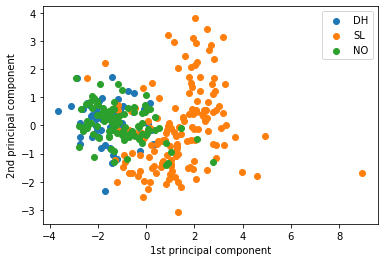

In [30]:
scatter(X1[dh], X2[dh])
scatter(X1[sl], X2[sl])
scatter(X1[no], X2[no])
xlabel("1st principal component")
ylabel("2nd principal component")
legend(["DH", "SL", "NO"])
plt.show()

Now the SL group separates quite cleanly from the DH and NO groups, with only a few outliers. Given how several of the weights in the first principal component are about the same size, we now undertand why considering a single or even a pair of attributes did not show such a clear picture. 

The DH and NO groups do not separate particularly well. We can take a look at the third principal component.

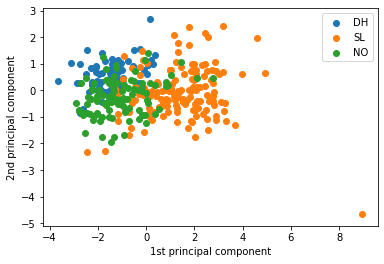

In [31]:
X3 = np.matmul(X0,evecs[:,3])
scatter(X1[dh], X3[dh])
scatter(X1[sl], X3[sl])
scatter(X1[no], X3[no])
xlabel("1st principal component")
ylabel("2nd principal component")
legend(["DH", "SL", "NO"])
plt.show()

The separation of the DH and NO groups is slightly better, but still not great. 

## A high dimensional example

In the rest of the exercise, you will explore a much larger dataset using PCA. It is also a medical example from the same [data source](http://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq). Gene expression levels have been measured for ~20,000 genes in ~800 patients, who have one of five different types of tumors: BRCA, KIRC, COAD, LUAD and PRAD. Is it possible to predict the type of tumor by considering the gene expression levels?

Use PCA to determine the linear combination of gene expression levels that allows the best separation of the five types of tumors. Save your work in the notebook, you will need it to complete the quiz on moodle later this Term. 

Start by loading the data (it may take a while!)

In [32]:
X = np.genfromtxt('cancer-gene-data2.csv', delimiter=',')

Originally there were more than 20,000 genes in the data set, and it would take quite a long time for your computer to solve such a large problem, so it was reduced by taking only every 2nd gene into account - hopefully we will not miss out on the important ones!

In [33]:
X.shape

(801, 10266)

So we have 801 patients, and left with 10266 genes. This time, the data is large, so do not form the $X^TX$ matrix, but use SVD straight away. Do not forget to normalise the data first. 

In this example, the tumor types are in a separate file, converted to numbers 1-5:

In [34]:
tumor = np.genfromtxt('cancer-gene-labels.csv', delimiter=',') 

In [35]:
tumor.shape

(801,)

In [105]:
tumor[:10]

array([1., 2., 1., 1., 3., 1., 4., 1., 3., 1.])

In [43]:
t1 = [index for index,value in enumerate(tumor) if value == 1]
t2 = [index for index,value in enumerate(tumor) if value == 2]
t3 = [index for index,value in enumerate(tumor) if value == 3]
t4 = [index for index,value in enumerate(tumor) if value == 4]
t5 = [index for index,value in enumerate(tumor) if value == 5]

In [107]:
print(len(t1),len(t2),len(t3),len(t4),len(t5))

136 141 300 146 78


In [50]:
t1 = np.array(t1)

In [59]:
X[t1,0].shape

(136,)

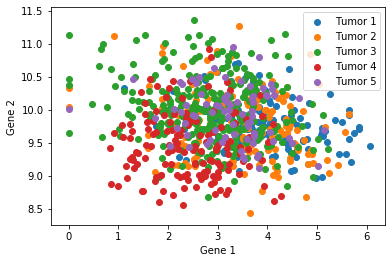

In [122]:
scatter(X[t1,1], X[t1,2])
scatter(X[t2,1], X[t2,2])
scatter(X[t3,1], X[t3,2])
scatter(X[t4,1], X[t4,2])
scatter(X[t5,1], X[t5,2])
legend(["Tumor 1", "Tumor 2", "Tumor 3", "Tumor 4", "Tumor 5"])
xlabel("Gene 1")
ylabel("Gene 2")
plt.savefig("2D-Original.png",dpi=160)
plt.show()

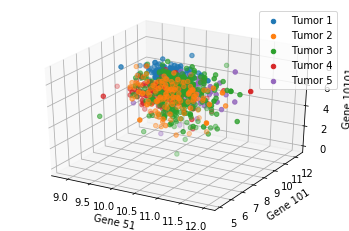

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[t1, 51], X[t1, 101], X[t1, 10101], label='Tumor 1')
ax.scatter(X[t2, 51], X[t2, 101], X[t2, 10101], label='Tumor 2')
ax.scatter(X[t3, 51], X[t3, 101], X[t3, 10101], label='Tumor 3')
ax.scatter(X[t4, 51], X[t4, 101], X[t4, 10101], label='Tumor 4')
ax.scatter(X[t5, 51], X[t5, 101], X[t5, 10101], label='Tumor 5')
ax.set_xlabel('Gene 51')
ax.set_ylabel('Gene 101')
ax.set_zlabel('Gene 10101')
ax.legend()
plt.show()
fig.savefig("3D-Original.png", dpi=160)

Start your PCA analysis here:

In [64]:
X0 = normalise(X)

In [66]:
X0.sum(axis=0).shape

(10266,)

In [126]:
X0.mean()

-1.351152313569359e-16

In [128]:
X0.var()

0.986460159750634

In [67]:
XTX = np.matmul(np.transpose(X0), X0) 

In [68]:
U,s,V = np.linalg.svd(X0)
U.shape,s.shape,V.shape

((801, 801), (801,), (10266, 10266))

In [71]:
s2 = s**2
s2.shape

(801,)

In [86]:
s2[:10]

array([854249.24365878, 701018.8281048 , 634060.03563244, 416039.89211685,
       326676.68744356, 234975.20584682, 192196.35461679, 175017.58126357,
       132849.21705801,  98255.99504568])

In [72]:
V.shape

(10266, 10266)

In [73]:
U.shape

(801, 801)

In [80]:
# Three most principled components 
X1 = np.matmul(X0,V[0])
X2 = np.matmul(X0,V[1])
X3 = np.matmul(X0,V[2])
X4 = np.matmul(X0,V[3])
X5 = np.matmul(X0,V[4])

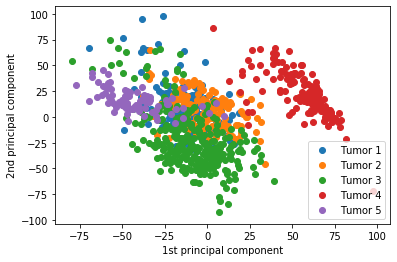

In [138]:
scatter(X1[t1], X2[t1])
scatter(X1[t2], X2[t2])
scatter(X1[t3], X2[t3])
scatter(X1[t4], X2[t4])
scatter(X1[t5], X2[t5])

xlabel("1st principal component")
ylabel("2nd principal component")
legend(["Tumor 1", "Tumor 2", "Tumor 3", "Tumor 4", "Tumor 5"])
plt.savefig('12.png', dpi=160)
plt.show()

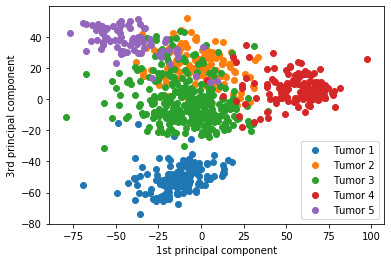

In [139]:
scatter(X1[t1], X3[t1])
scatter(X1[t2], X3[t2])
scatter(X1[t3], X3[t3])
scatter(X1[t4], X3[t4])
scatter(X1[t5], X3[t5])

xlabel("1st principal component")
ylabel("3rd principal component")
legend(["Tumor 1", "Tumor 2", "Tumor 3", "Tumor 4", "Tumor 5"])
plt.savefig('13.png', dpi=160)
plt.show()

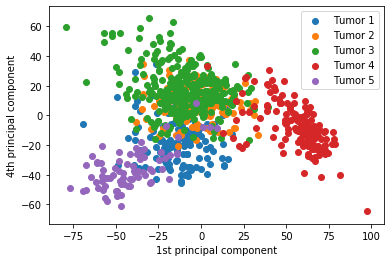

In [140]:
scatter(X1[t1], X4[t1])
scatter(X1[t2], X4[t2])
scatter(X1[t3], X4[t3])
scatter(X1[t4], X4[t4])
scatter(X1[t5], X4[t5])
xlabel("1st principal component")
ylabel("4th principal component")
legend(["Tumor 1", "Tumor 2", "Tumor 3", "Tumor 4", "Tumor 5"])
plt.savefig('14.png', dpi=160)
plt.show()

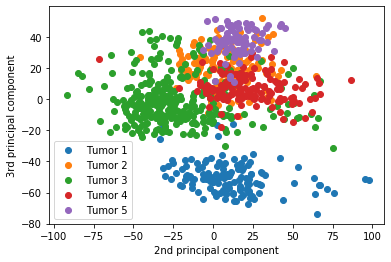

In [141]:
scatter(X2[t1], X3[t1])
scatter(X2[t2], X3[t2])
scatter(X2[t3], X3[t3])
scatter(X2[t4], X3[t4])
scatter(X2[t5], X3[t5])

xlabel("2nd principal component")
ylabel("3rd principal component")
legend(["Tumor 1", "Tumor 2", "Tumor 3", "Tumor 4", "Tumor 5"])
plt.savefig('23.png', dpi=160)
plt.show()

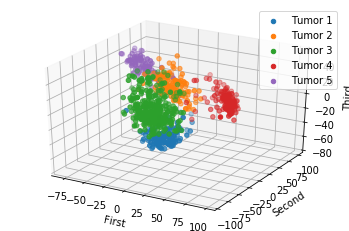

In [142]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X1[t1], X2[t1], X3[t1], label='Tumor 1')
ax.scatter(X1[t2], X2[t2], X3[t2], label='Tumor 2')
ax.scatter(X1[t3], X2[t3], X3[t3], label='Tumor 3')
ax.scatter(X1[t4], X2[t4], X3[t4], label='Tumor 4')
ax.scatter(X1[t5], X2[t5], X3[t5], label='Tumor 5')
ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')
ax.legend()
fig.savefig("123.png", dpi=160)
plt.show()

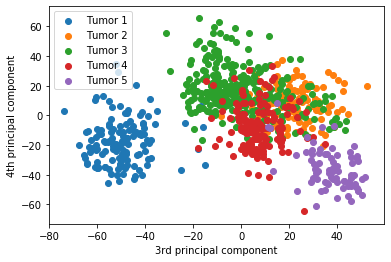

In [143]:
scatter(X3[t1], X4[t1])
scatter(X3[t2], X4[t2])
scatter(X3[t3], X4[t3])
scatter(X3[t4], X4[t4])
scatter(X3[t5], X4[t5])
legend(["Tumor 1", "Tumor 2", "Tumor 3", "Tumor 4", "Tumor 5"])
xlabel("3rd principal component")
ylabel("4th principal component")
plt.savefig('34.png', dpi=160)
plt.show()

### Draw Classification Boundaries with neural network:

In [191]:
import torch
import torch.nn.functional as F
import torch.nn as nn

#GPU Setup
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
    
device = get_default_device()

In [192]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10266,64)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(64,32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32,16)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(16,5)
        #self.relu4 = nn.ReLU()
        self.out =nn.Sigmoid()
        
    def forward(self, x):
        y = self.relu1(self.fc1(x))
        y = self.relu2(self.fc2(y))
        y = self.relu3(self.fc3(y))
        y = self.out(self.fc4(y))
        return y
    
model = Model()
to_device(model, device)

Model(
  (fc1): Linear(in_features=10266, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=16, out_features=5, bias=True)
  (out): Sigmoid()
)

In [193]:
# Helper Function For training

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def training_step(model, batch):
    images, labels = batch 
    out = model(images)                  # Generate predictions
    loss = F.cross_entropy(out, labels) # Calculate loss
    return loss
    
def validation_step(model, batch):
    images, labels = batch 
    out = model(images)                    # Generate predictions    
    loss = F.cross_entropy(out, labels)   # Calculate loss
    acc = accuracy(out, labels)           # Calculate accuracy
    return {'val_loss': loss.detach(), 'val_acc': acc}
        
def validation_epoch_end(outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
def epoch_end(epoch, result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch, result['train_loss'], result['val_loss'], result['val_acc']))

#Traning 
@torch.no_grad()
def evaluate(model, val_loader):
    # Tell PyTorch validation start, disable all regularization
    model.eval()
    # Take a Batch loss and Accuracy and Average through all the batches  
    outputs = [validation_step(model, batch) for batch in val_loader]
    return validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = training_step(model, batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        epoch_end(epoch, result)
        history.append(result)
    return history


Numpy array to Tensor Dataset

In [194]:
# Numpy array to torch tensor
X = torch.from_numpy(X0)
Y = torch.from_numpy(tumor)
# Our label is 1-5, torch requires 0-4
# Therefore reduce 1 for each label 
Y -= 1 

X = X.float()
Y = Y.long()

In [198]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

train_ds = TensorDataset(X, Y)
train_dl = DataLoader(train_ds, shuffle=True)
train_dl = DeviceDataLoader(train_dl, device)


In [199]:
History = fit_one_cycle(10, 0.001, model, train_dl, train_dl, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.Adam)

Epoch [0], train_loss: 0.9690, val_loss: 0.7566, val_acc: 0.8302
Epoch [1], train_loss: 0.7514, val_loss: 0.7549, val_acc: 0.8227
Epoch [2], train_loss: 0.7553, val_loss: 0.7490, val_acc: 0.8277
Epoch [3], train_loss: 0.7537, val_loss: 0.7590, val_acc: 0.8215
Epoch [4], train_loss: 0.7470, val_loss: 0.7463, val_acc: 0.8302
Epoch [5], train_loss: 0.7480, val_loss: 0.7494, val_acc: 0.8302
Epoch [6], train_loss: 0.7491, val_loss: 0.7489, val_acc: 0.8302
Epoch [7], train_loss: 0.7497, val_loss: 0.7504, val_acc: 0.8302
Epoch [8], train_loss: 0.7502, val_loss: 0.7502, val_acc: 0.8302
Epoch [9], train_loss: 0.7505, val_loss: 0.7508, val_acc: 0.8302


0774791e-05,
   4.430852537689502e-05,
   4.419330410380569e-05,
   4.4078225924651776e-05,
   4.396329087556047e-05,
   4.384849899261352e-05,
   4.3733850311848374e-05,
   4.361934486925685e-05,
   4.3504982700786334e-05,
   4.33907638423388e-05,
   4.327668832977176e-05,
   4.316275619889719e-05,
   4.304896748548229e-05,
   4.293532222524934e-05,
   4.282182045387548e-05,
   4.2708462206992696e-05,
   4.259524752018792e-05,
   4.2482176429003416e-05,
   4.2369248968935814e-05,
   4.225646517543695e-05,
   4.214382508391363e-05,
   4.203132872972738e-05,
   4.1918976148194585e-05,
   4.180676737458655e-05,
   4.169470244412957e-05,
   4.158278139200458e-05,
   4.1471004253347345e-05,
   4.13593710632487e-05,
   4.124788185675403e-05,
   4.1136536668863646e-05,
   4.102533553453249e-05,
   4.0914278488670575e-05,
   4.080336556614241e-05,
   4.069259680176728e-05,
   4.058197223031946e-05,
   4.047149188652759e-05,
   4.0361155805075556e-05,
   4.025096402060124e-05,
   4.01409165676

### Try fitting with Several components of the PCA